### Given city polution data Use clustering to group cities as per the NO familiy polution
  - Data: https://github.com/CoderFundamentals/python/blob/master/agglomerative/data/city_day.csv

- We will be using agglomerative clustering to identify and group these data 
- In hirearchical clustering, agglomerative approach follows buttom up approach
    - In this each data point at the start of iteration is considered a cluster itself, so k cluster given k datapoints
    - Based on the distance between the data points, they are grouped together to form a cluster resulting in  k-1
    - This iteration is followed till we get one large cluster
    - Dendrograms can be used to measure the distance between the clusters and identify the ideal no of clusters


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.preprocessing import MinMaxScaler

In [2]:
city_Pollution_data = pd.read_csv('../data/city_day.csv')
city_Pollution_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
city_Pollution_data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [4]:
city_Pollution_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [5]:
city_Pollution_data_no = city_Pollution_data[['NO','NO2','NOx','City']]
city_Pollution_data_no.head()

,NO,NO2,NOx,City
0,0.92,18.22,17.15,Ahmedabad
1,0.97,15.69,16.46,Ahmedabad
2,17.40,19.30,29.70,Ahmedabad
3,1.70,18.48,17.97,Ahmedabad
4,22.10,21.42,37.76,Ahmedabad


In [6]:
city_Pollution_data_no.shape

(29531, 4)

In [7]:
city_Pollution_data_no.isnull().sum()

NO      3582
NO2     3585
NOx     4185
City       0
dtype: int64

In [8]:
city_Pollution_data_no = city_Pollution_data_no.dropna()

In [9]:
city_Pollution_data_no.shape

(23938, 4)

In [10]:
city_Pollution_data_no.columns

Index(['NO', 'NO2', 'NOx', 'City'], dtype='object')

In [11]:
city_Pollution_data_no_state = city_Pollution_data_no.groupby('City',as_index=False)[['NO', 'NO2', 'NOx']].agg(np.sum)

In [12]:
city_Pollution_data_no_state.head()

,City,NO,NO2,NOx
0,Ahmedabad,31399.23,82687.68,66643.59
1,Aizawl,1063.11,43.90,1424.97
2,Amaravati,3974.72,19869.47,13780.85
3,Amritsar,17816.94,17528.54,32865.72
4,Bengaluru,18825.99,56016.40,39461.27


In [13]:
scaled = MinMaxScaler().fit_transform(city_Pollution_data_no_state[['NO','NO2','NOx']])
scaled

array([[0.39953188, 0.81117187, 0.56537722],
       [0.01067656, 0.        , 0.00977445],
       [0.04799824, 0.19459353, 0.11503521],
       [0.22543098, 0.17161664, 0.27762078],
       [0.23836521, 0.54938578, 0.33380881],
       [0.02230667, 0.08571478, 0.05113579],
       [0.13163475, 0.11152131, 0.15050705],
       [0.0374323 , 0.03375887, 0.03612082],
       [0.22948205, 0.32602622, 0.29460042],
       [0.02329328, 0.08593582, 0.08647013],
       [1.        , 1.        , 1.        ],
       [0.03653234, 0.00348246, 0.02601038],
       [0.30889752, 0.29480695, 0.30190212],
       [0.12576656, 0.0662928 , 0.18673427],
       [0.19525008, 0.55068729, 0.3286701 ],
       [0.19363588, 0.3260272 , 0.33598271],
       [0.13322703, 0.02235195, 0.08644014],
       [0.26822374, 0.31200558, 0.428667  ],
       [0.31969982, 0.54326271, 0.32083331],
       [0.28564294, 0.18876374, 0.3513502 ],
       [0.6721697 , 0.60816115, 0.64552262],
       [0.        , 0.00634646, 0.        ],
       [0.

In [14]:
city_Pollution_data_no_state_scaled_df = pd.DataFrame(scaled,columns=['NO','NO2','NOx'])

In [15]:
city_Pollution_data_no_state_scaled_df.head()

,NO,NO2,NOx
0,0.399532,0.811172,0.565377
1,0.010677,0.000000,0.009774
2,0.047998,0.194594,0.115035
3,0.225431,0.171617,0.277621
4,0.238365,0.549386,0.333809


In [16]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [17]:
z =linkage(scaled,method ="ward")

<function matplotlib.pyplot.show(close=None, block=None)>

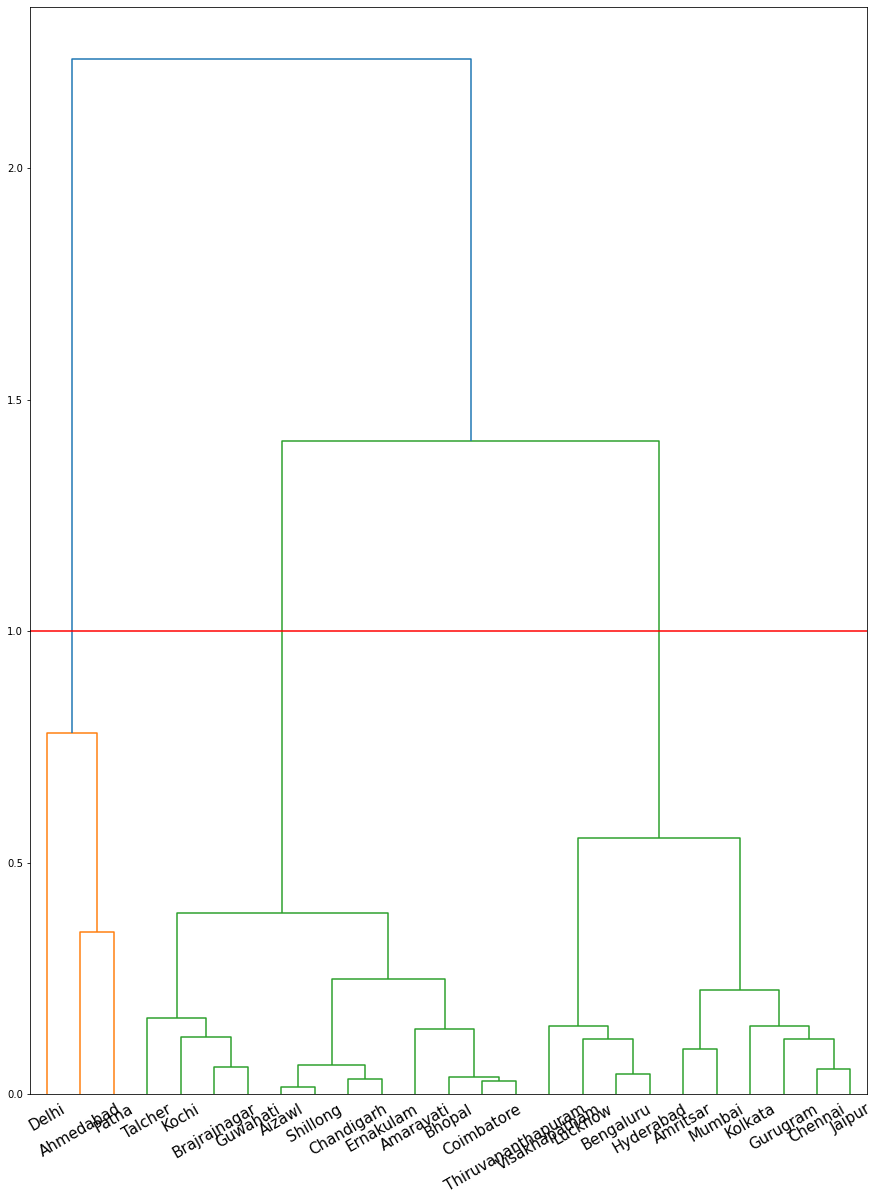

In [31]:
fig, ax = plot.subplots(figsize = (15,20))
ax =dendrogram(z,orientation = 'top',labels = np.array(city_Pollution_data_no_state.City),leaf_font_size=15,leaf_rotation=30)
plot.tight_layout
point1 = [0,1]
point2 = [400,1]
X_values = [point1[0], point2[0]]
Y_values = [point1[1], point2[1]]
plot.plot(X_values,Y_values, color = 'red')
plot.show

- If we draw a an horizontal line ,it seems no of cluster will be 3
- Thus we can consider that for agllomerative clustering approach

In [78]:
from sklearn.cluster import AgglomerativeClustering

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [81]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(scaled)

array([0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2,
       2, 2, 1])

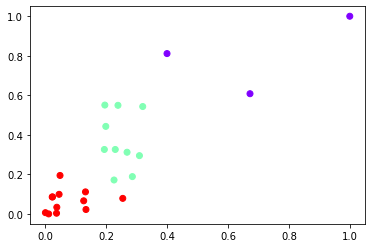

In [82]:
plot.scatter(scaled[:,0],scaled[:,1], c= cluster.labels_,cmap='rainbow')